In [100]:
import os
import pandas as pd
import numpy as np
from pandas_data_download import stock
from matplotlib.pyplot import plot as plt
from matplotlib.pyplot import figure, legend


%matplotlib inline

In [36]:
# Import Banking Data
banking_data = pd.read_excel("Master_Excel.xlsx", "Banking")

In [38]:
hdfc = stock('HDFCBANK.NS')

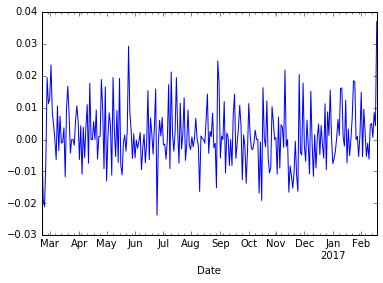

In [66]:
hdfc.data_matrix['returns_data']['Simple_Returns'].plot()

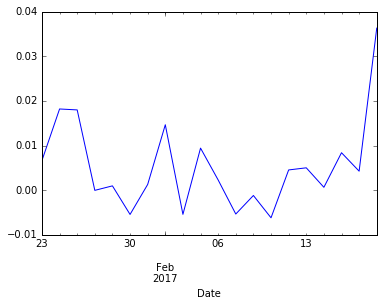

In [55]:
hdfc.data_matrix['returns_data']['Log_Returns'][-20:].plot()

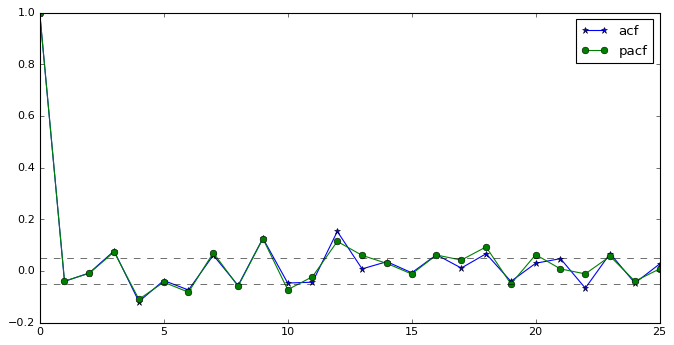

In [102]:
# number of points in acf and pacf
n = len(hdfc.acf_pacf['Log_Returns']['acf'])

# Figure dimensions
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')


plt(hdfc.acf_pacf['Log_Returns']['acf'], marker = '*', label = 'acf')
plt(hdfc.acf_pacf['Log_Returns']['pacf'], marker = 'o', label = 'pacf')
plt([0.05 for x in range(n)], linestyle = '--', color = 'black', linewidth = 0.5)
plt([-0.05 for x in range(n)], linestyle = '--', color = 'black', linewidth = 0.5)

# Display labels as legends
legend()

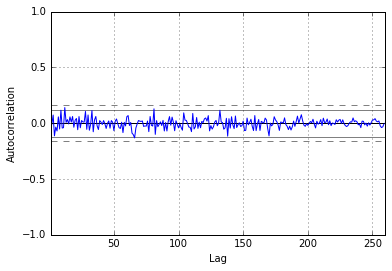

In [86]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(hdfc.data_matrix['returns_data']['Log_Returns'])

In [87]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
# fit model
model = ARIMA(hdfc.data_matrix['returns_data']['Log_Returns'], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Log_Returns   No. Observations:                  259
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 793.095
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 19 Feb 2017   AIC                          -1580.191
Time:                        16:13:34   BIC                          -1569.520
Sample:                    02-23-2016   HQIC                         -1575.901
                         - 02-17-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0001      0.000      0.270      0.788      -0.001       0.001
ar.L1.D.Log_Returns    -0.5191      0.054     -9.617      0.000      -0.625      -0.413
                

                0
count  259.000000
mean    -0.000037
std      0.011352
min     -0.033900
25%     -0.007582
50%     -0.000550
75%      0.006857
max      0.033698


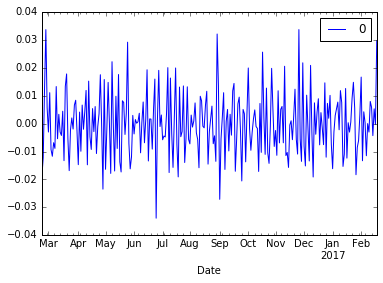

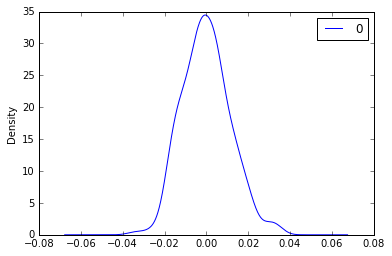

In [95]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
print(residuals.describe())
residuals.plot()
residuals.plot(kind='kde')